<a href="https://colab.research.google.com/github/GKS07/Computer_Vision/blob/main/Facial_Expression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Expression Detection

Facial expression detection or recognition is a computer vision task aimed at identifying and categorizing the emotion expressed depicted on human face.

In this notebook i will build a model using tensorflow, transfer learning and YOLO.
steps that i'll follow.


*   Importing Libraries
*   Downloading Data
*   Preparing Data
*   Augmenting Images
*   Build Model(Using Tensorflow and Transfer Learning)

# Imporing Libraries

In [7]:
import os
import shutil
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Downloading the Dataset from Kaggle**

I will use the data from kaggle that is edited for Yolo model(have a text file that contains the dimensions of the images.) All the images are of 96*96 pixels.
there are 8 emotion classes:

0- Anger</br>
1- Contempt</br>
2- Disgust</br>
3- Fear</br>
4- Happy</br>
5- Neutral</br>
6- Sad</br>
7- Surprise

In [6]:
# uploading the kaggle jason file

from google.colab import files
files.upload()

# copying the kaggle file

!mkdir ~/.kaggle # nmaking the folder

! cp kaggle.json ~/.kaggle/  #copy the file

#changing the permission.
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#changing the current directory
os.chdir('/content/drive/MyDrive')

# getting the current directory
os.getcwd()

# making the folder
!mkdir Facial_Exp3

# downloading the data from kaggle
!kaggle datasets download -d fatihkgg/affectnet-yolo-format

#unzipping the data
!unzip affectnet-yolo-format.zip -d Facial_Exp3

# **Preaparing and Augmenting the data.**

In [8]:
# data for yolo model

img_path = '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images'# Train images


label_path = '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/labels'#train_;labels


In [9]:
labels_map = {
    '0' : 'Anger',
    '1' : 'Contempt',
    '2' : 'Disgust',
    '3' : 'Fear',
    '4' : 'Happy',
    '5' : 'Neutral',
    '6' : 'Sad',
    '7' : 'Surprise'
    }

In [ ]:
#displaying the images.

def display_one_image(image, title, subplot, color):
  plt.subplot(subplot)
  plt.axis('off')
  plt.imshow(image)
  plt.title(title, fontsize=16, color=color)

# plotting the 9 images
def display_nine_images(images, titles, title_colors  = None):
  subplot = 331
  plt.figure(figsize=(5,8))
  for i in range(9):
    color = 'black' if title_colors is None else title_colors[i]
    imge = plt.imread(images[i])
    with open(titles[i], 'r') as file:
      lab = file.read(1)
      lab = labels_map[lab]
    display_one_image(imge, lab, 331+i, color)
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.01, hspace=0.01)
  plt.show()

In [10]:
images, labels = [],[]

for img_file, label_file in tqdm(zip(os.listdir(img_path), os.listdir(label_path))):
  img = os.path.join(img_path, img_file)
  label = os.path.join(label_path, label_file)
  images.append(img)
  labels.append(label)
  #print(img)

0it [00:00, ?it/s]

In [12]:
images.sort()
labels.sort()

In [14]:
# creating new folder for training data

os.mkdir('/content/drive/MyDrive/Facial_Exp3/YOLO_format/train2')
os.mkdir('/content/drive/MyDrive/Facial_Exp3/YOLO_format/train2/images')
os.mkdir('/content/drive/MyDrive/Facial_Exp3/YOLO_format/train2/labels')

In [15]:
img_dir = '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train2/images'
lab_dir = '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train2/labels'

In [13]:
images[:15], labels[:15]

(['/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_0.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_1.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_10.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_100.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_1000.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_1001.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_1003.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_1004.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_1005.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_1007.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_1008.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/images/ffhq_1009.png',
  '/content/drive/MyDrive/Facial_Exp3/YOLO_format/train/image

In [17]:
for img in tqdm(images[:10000]):
  shutil.copy(img, img_dir)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [18]:
for lab in tqdm(labels[:10000]):
  shutil.copy(lab, lab_dir)

  0%|          | 0/10000 [00:00<?, ?it/s]

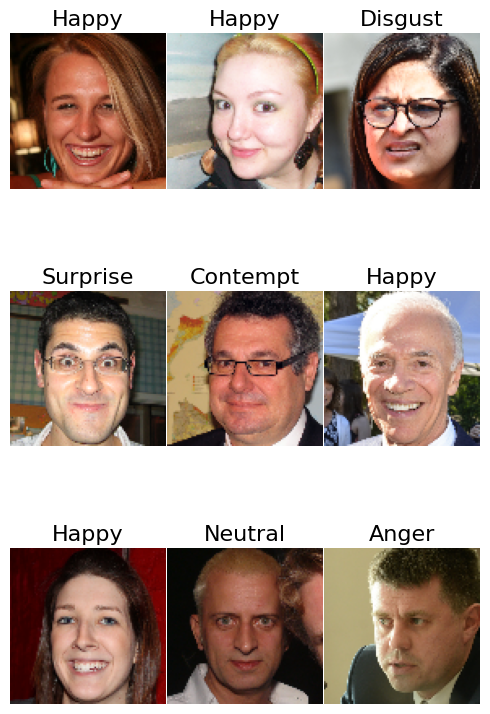

In [ ]:
#sorting the appended list
images.sort(), labels.sort()

#displaying the images with their labels.
display_nine_images(images[:9], labels[:9])

**Images per Category in training Data**

In [ ]:
labels2 = '/content/drive/MyDrive/Facial_Expression_Detection_Recognition/YOLO_format/train3/labels'

facial_exp = []

for label in tqdm(os.listdir(labels2)):
  path = os.path.join(labels2, label)
  with open(path, 'r') as file1:
    exp = file1.read(1)
    exp = labels_map[exp]
  facial_exp.append(exp)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
unique, counts = np.unique(facial_exp, return_counts=True)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Anger'),
  Text(1, 0, 'Contempt'),
  Text(2, 0, 'Disgust'),
  Text(3, 0, 'Fear'),
  Text(4, 0, 'Happy'),
  Text(5, 0, 'Neutral'),
  Text(6, 0, 'Sad'),
  Text(7, 0, 'Surprise')])

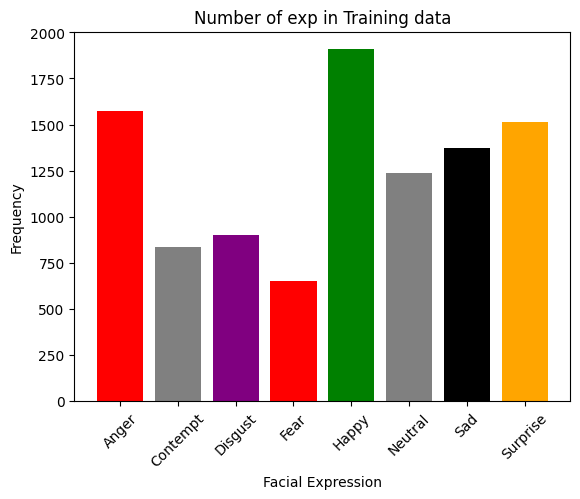

In [ ]:
color = ['red', 'grey', 'purple', 'red', 'green', 'grey', 'black', 'orange']
plt.bar(unique, counts, color = color)
plt.xlabel('Facial Expression')
plt.ylabel('Frequency')
plt.title('Number of exp in Training data')
plt.xticks(rotation = 45)

The above graph clearly shows that the data is imbalence so my model may be slightly skewed towards the data in majority(Anger or Happy). we can solve this problem by balencing the data. i will do it later.

# **Building the YOLO model**

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [4]:
#importing the yolo
from ultralytics import YOLO

**Training the model**

In [21]:
os.chdir('/content/drive/MyDrive/Facial_Exp3')
os.getcwd()

'/content/drive/MyDrive/Facial_Exp3'

In [22]:
with tf.device('/device:GPU:0'):

  !yolo task = detect mode = train model = yolov8m.pt data = '/content/drive/MyDrive/Facial_Exp3/YOLO_format/data.yaml' epochs = 10 imgsz = 96 plots = True

100% 49.7M/49.7M [00:00<00:00, 157MB/s]
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Facial_Exp3/YOLO_format/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=96, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

In [23]:
# function for displaying results.
def display_results(img, title):
  plt.figure(figsize = (20,25))
  img = plt.imread(img)
  plt.imshow(img)
  plt.title(title)
  plt.show()


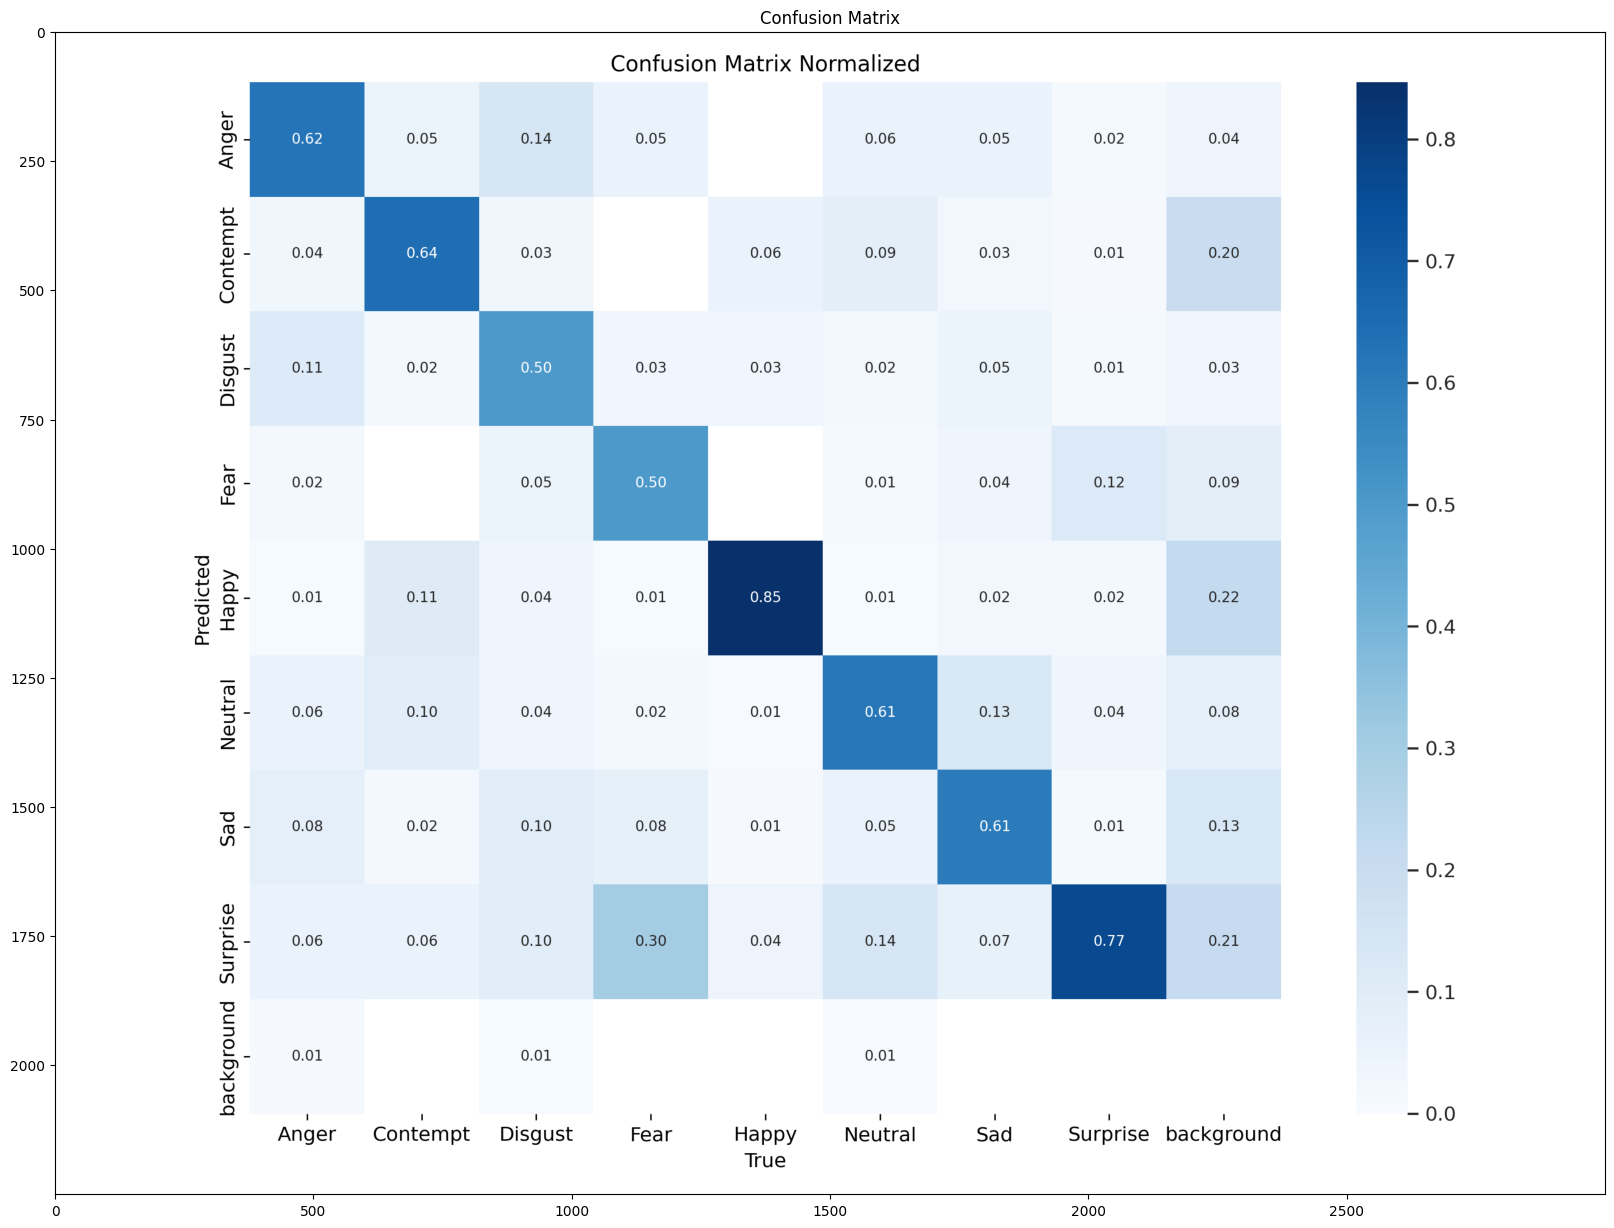

In [24]:
#displaying the confusion matrix

display_results('/content/drive/MyDrive/Facial_Exp3/runs/detect/train/confusion_matrix_normalized.png', 'Confusion Matrix')

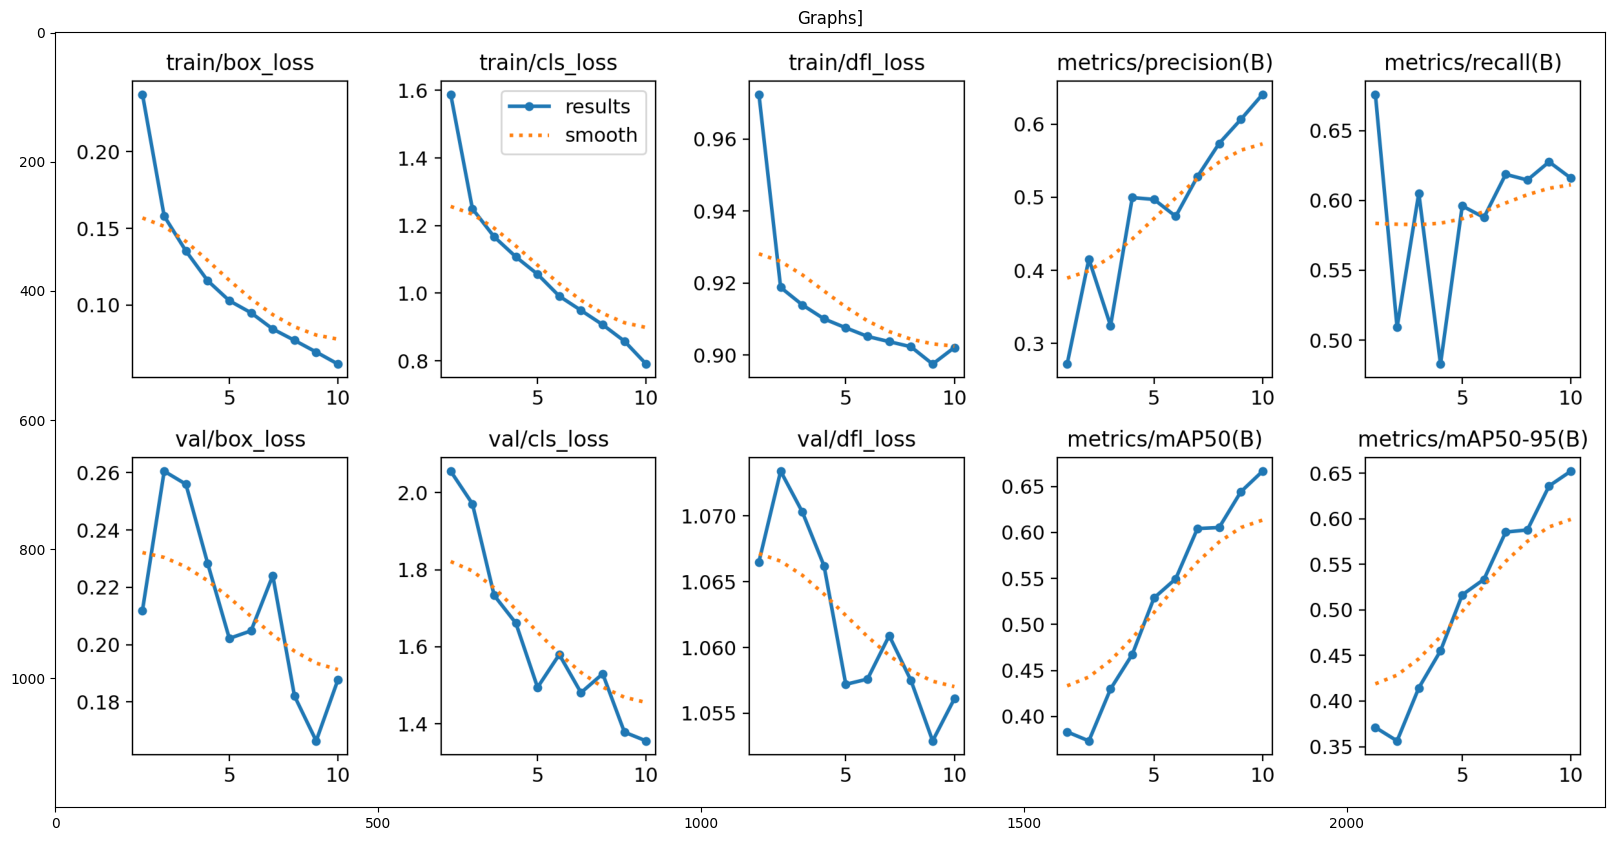

In [25]:
display_results('/content/drive/MyDrive/Facial_Exp3/runs/detect/train/results.png', 'Graphs]')

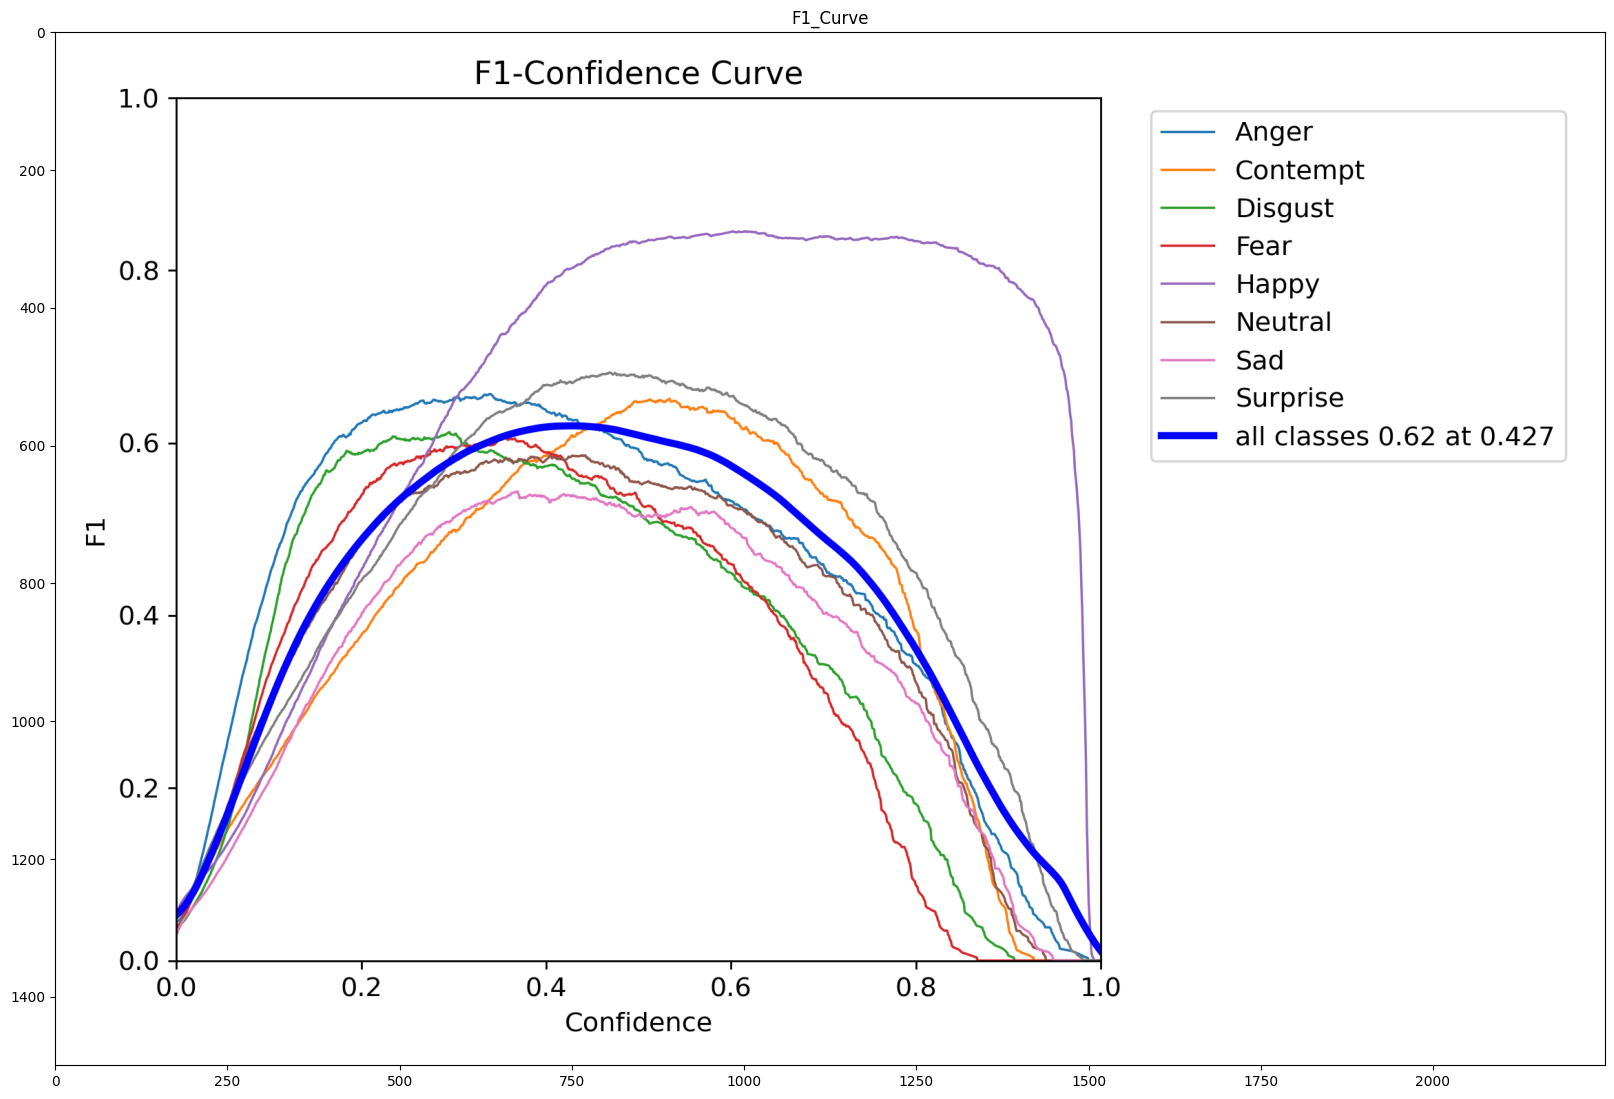

In [26]:
display_results('/content/drive/MyDrive/Facial_Exp3/runs/detect/train/F1_curve.png', "F1_Curve")

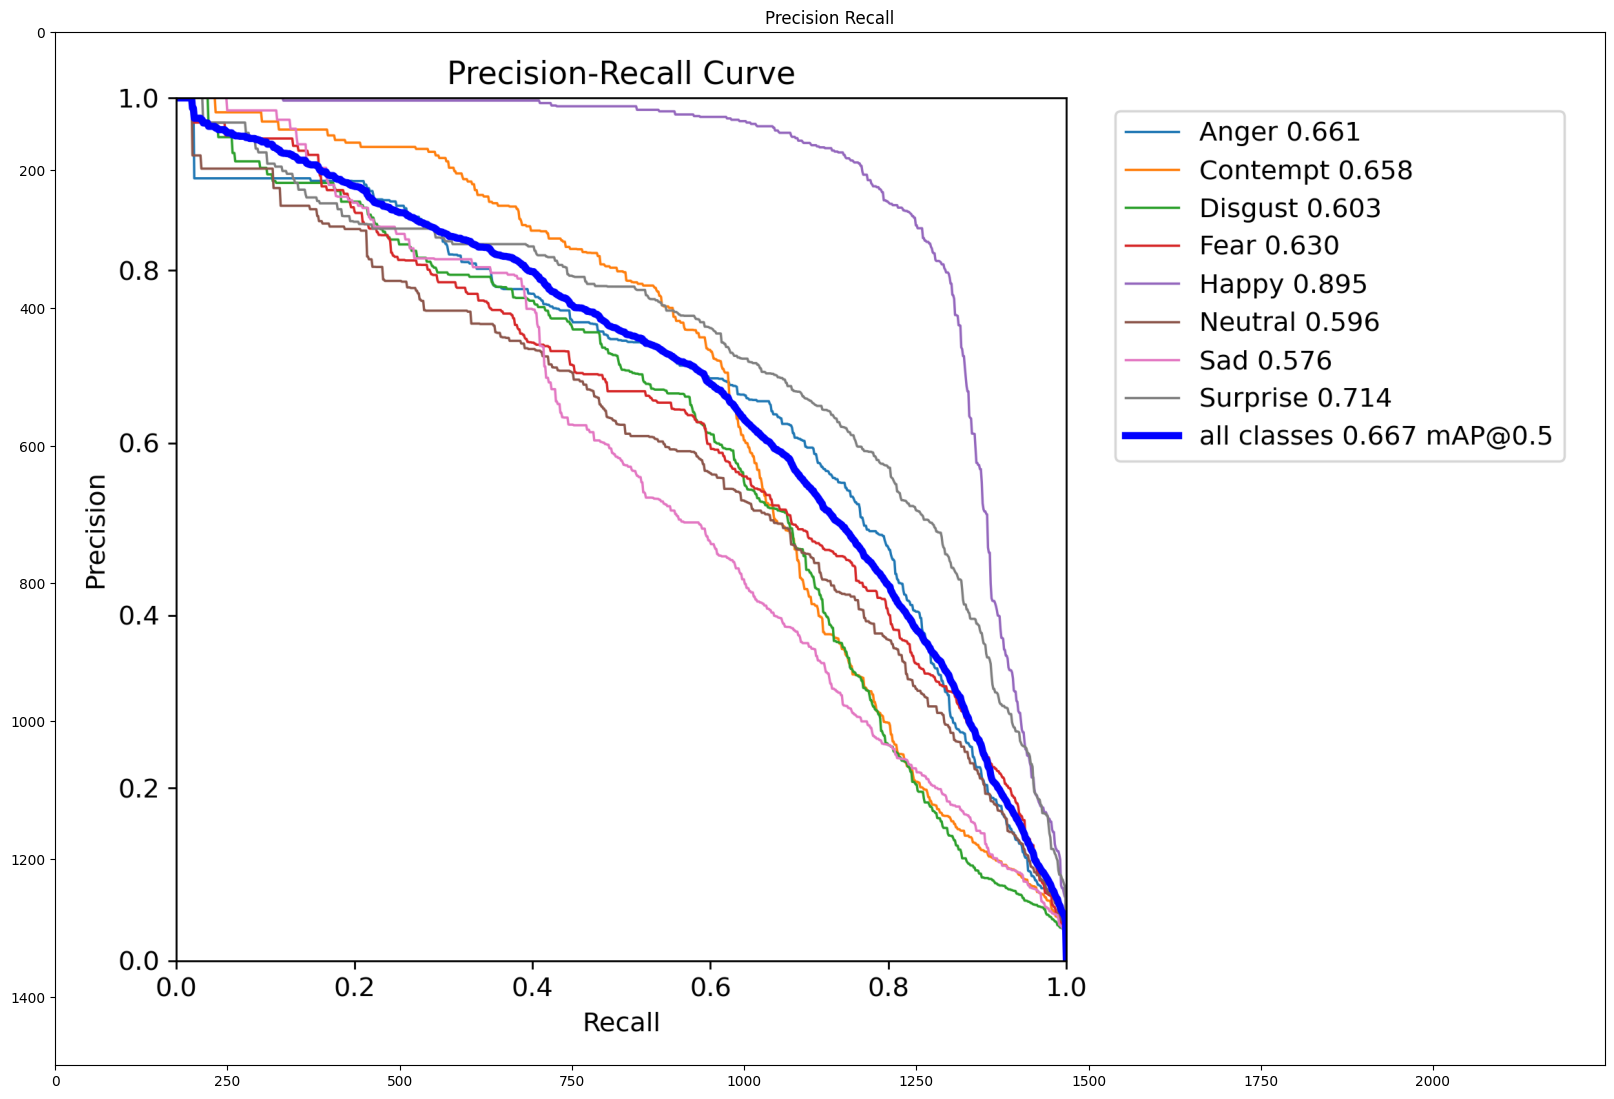

In [27]:
display_results('/content/drive/MyDrive/Facial_Exp3/runs/detect/train/PR_curve.png', 'Precision Recall')

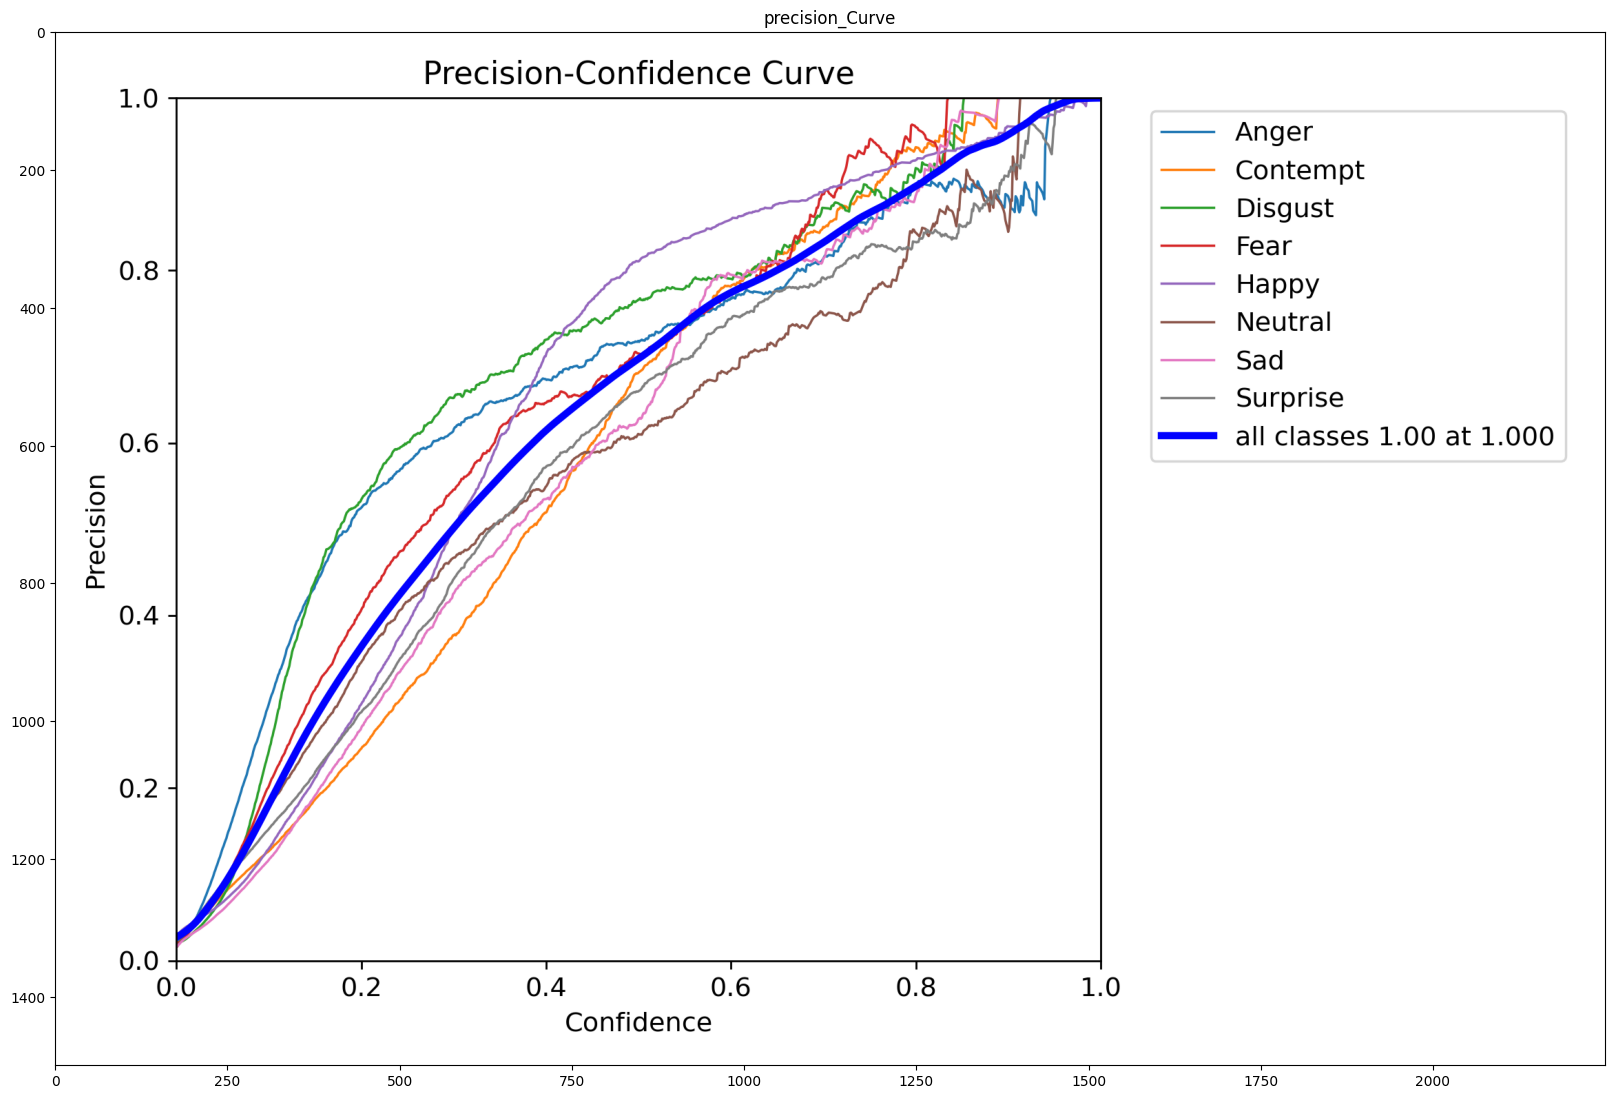

In [28]:
display_results('/content/drive/MyDrive/Facial_Exp3/runs/detect/train/P_curve.png', 'precision_Curve')

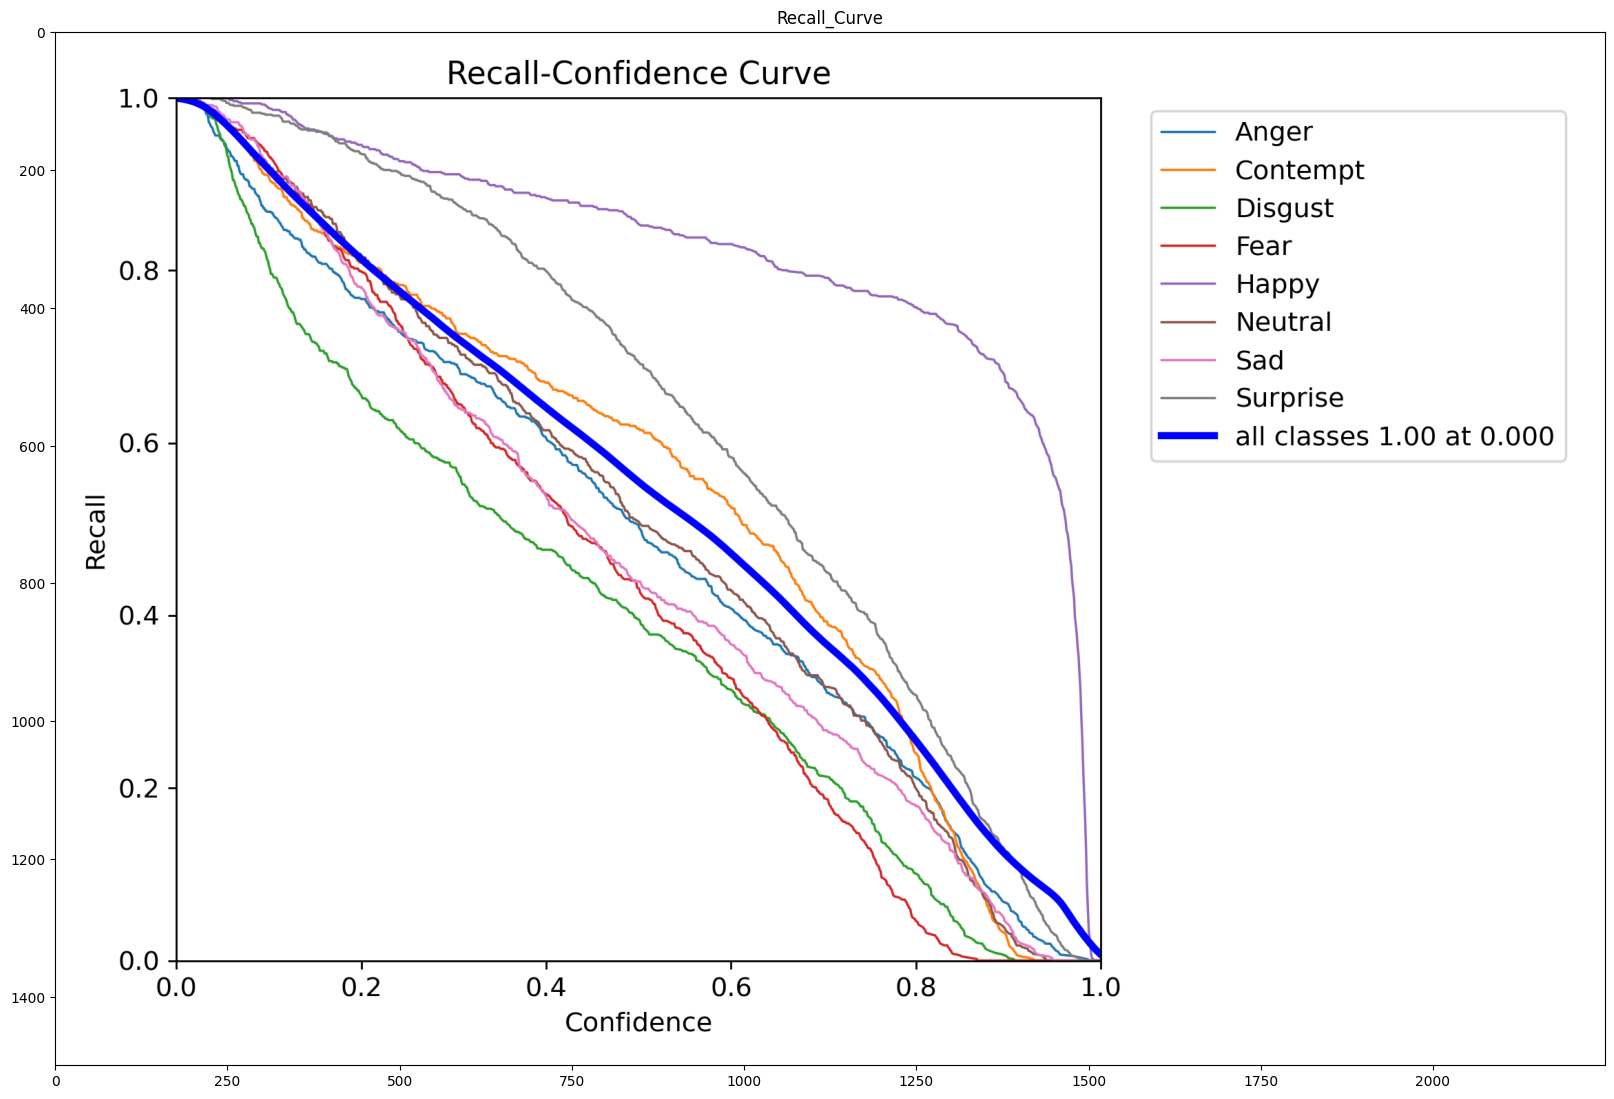

In [29]:
display_results('/content/drive/MyDrive/Facial_Exp3/runs/detect/train/R_curve.png', 'Recall_Curve')

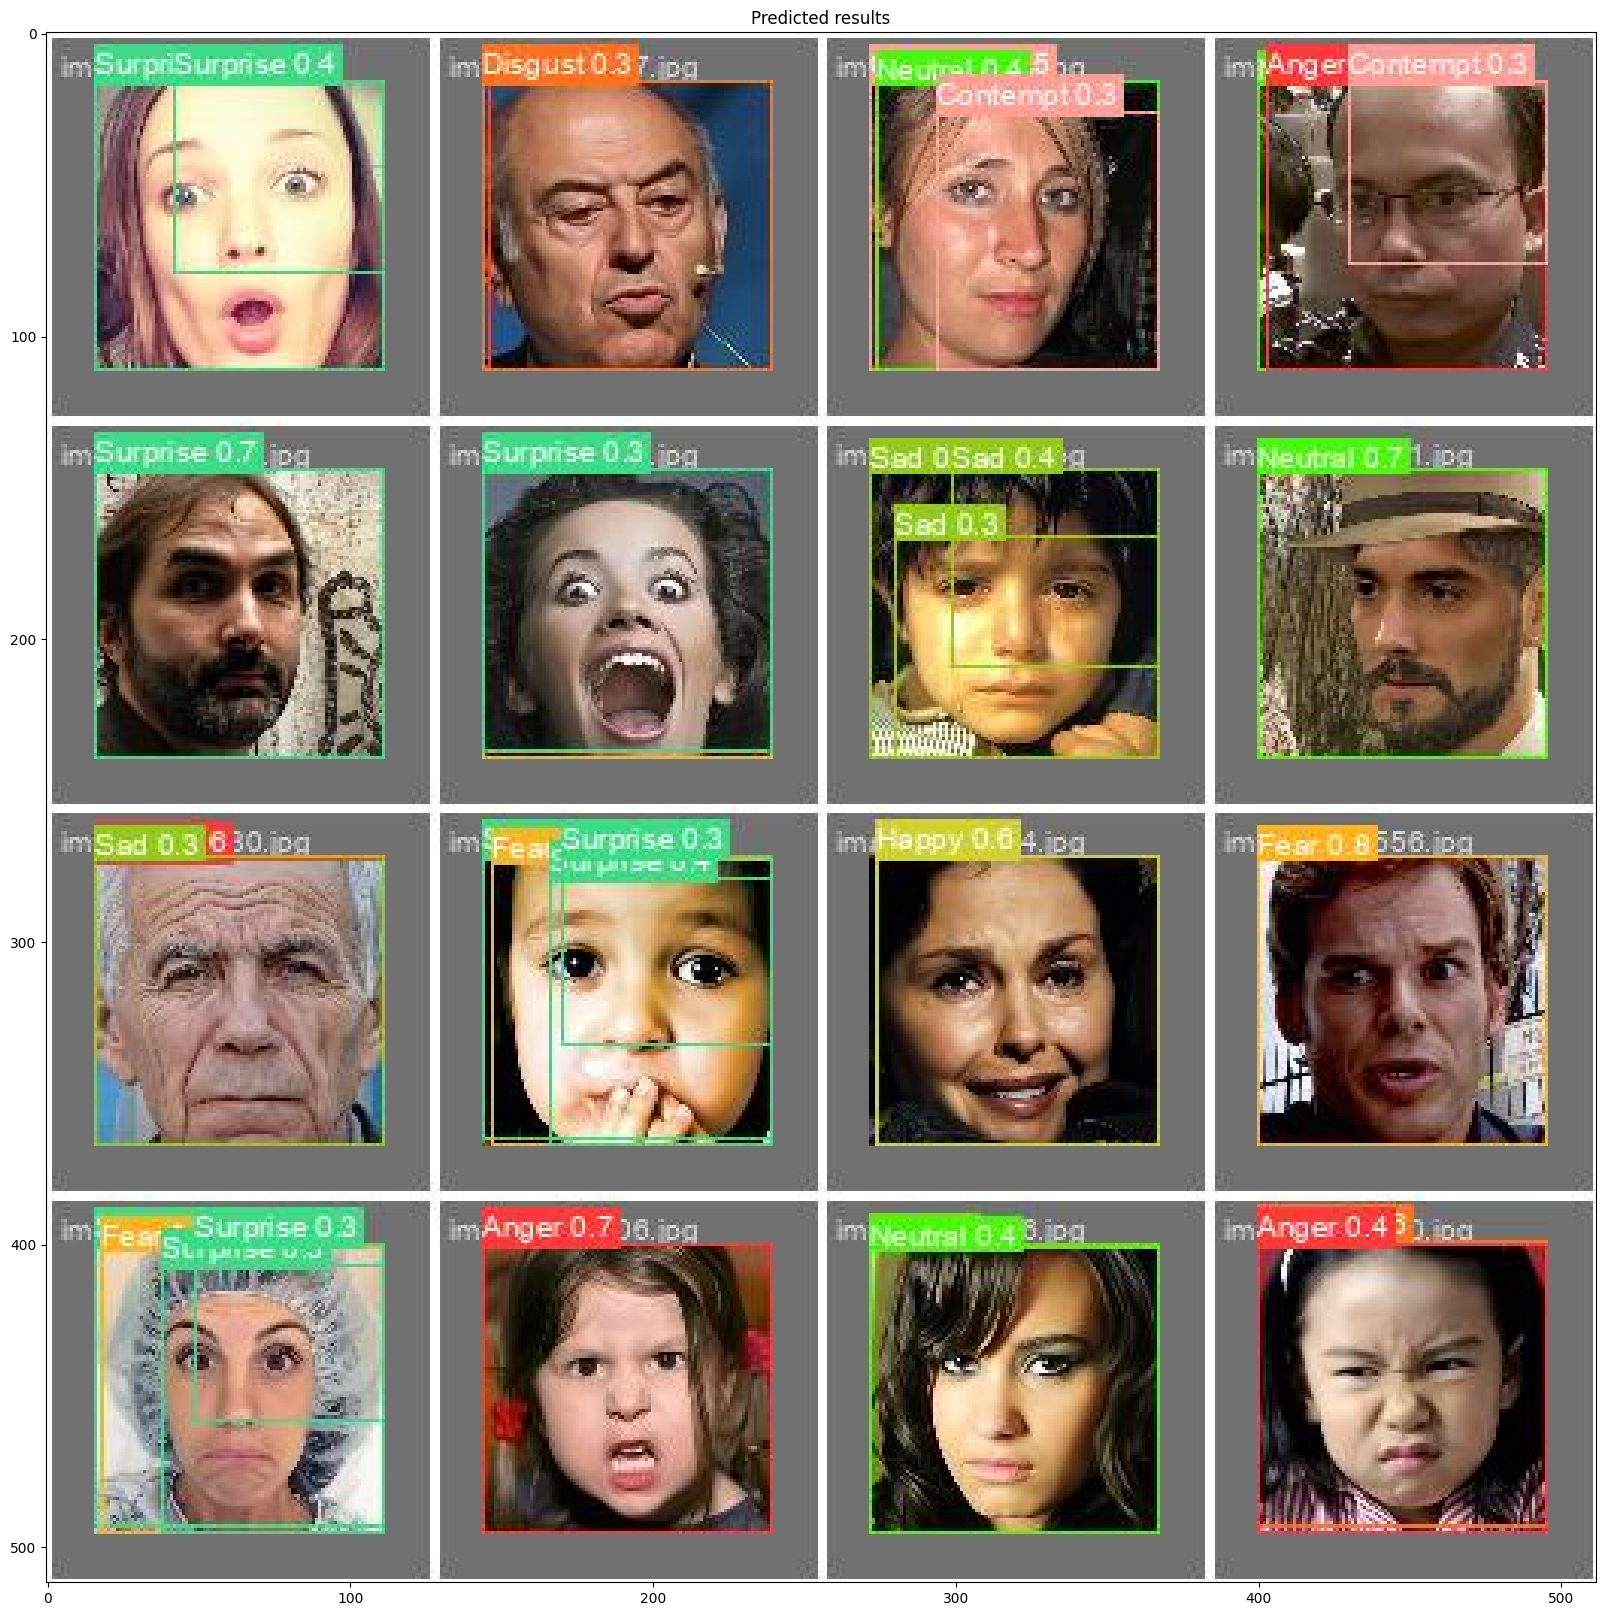

In [30]:
display_results('/content/drive/MyDrive/Facial_Exp3/runs/detect/train/val_batch2_pred.jpg', 'Predicted results')

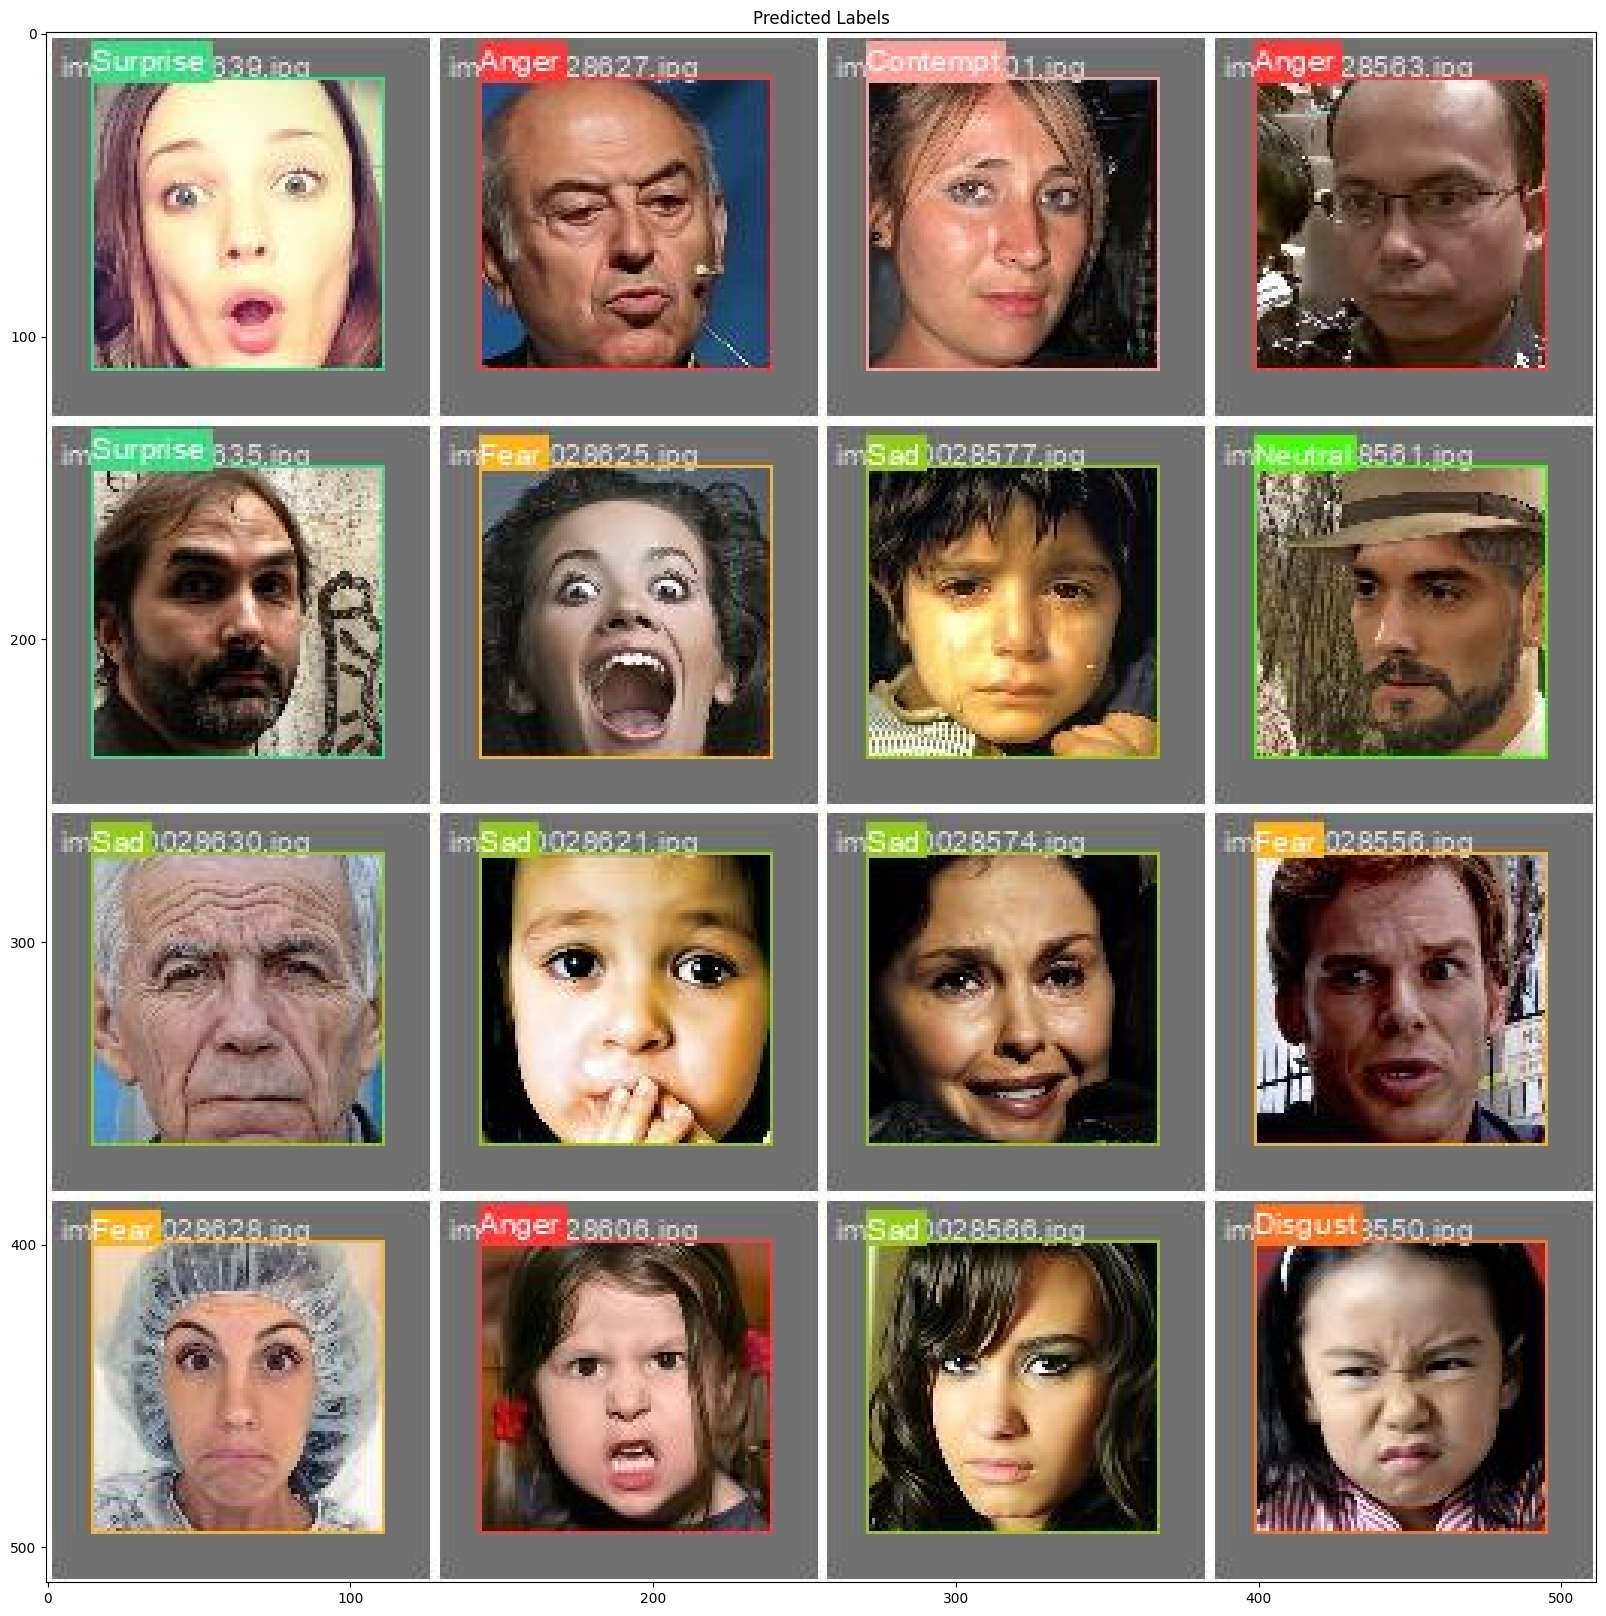

In [31]:
display_results('/content/drive/MyDrive/Facial_Exp3/runs/detect/train/val_batch2_labels.jpg', 'Predicted Labels')

**Evaluating the model with Test data.**

In [5]:
!yolo task=detect mode = predict model = /content/Facial_Expression_model_best.pt conf = 0.40 source = /content/drive/MyDrive/Facial_Exp3/YOLO_format/test/images

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs

image 1/2755 /content/drive/MyDrive/Facial_Exp3/YOLO_format/test/images/ffhq_1002.png: 96x96 1 Neutral, 231.4ms
image 2/2755 /content/drive/MyDrive/Facial_Exp3/YOLO_format/test/images/ffhq_1014.png: 96x96 1 Contempt, 249.9ms
image 3/2755 /content/drive/MyDrive/Facial_Exp3/YOLO_format/test/images/ffhq_102.png: 96x96 1 Happy, 254.4ms
image 4/2755 /content/drive/MyDrive/Facial_Exp3/YOLO_format/test/images/ffhq_103.png: 96x96 1 Happy, 383.8ms
image 5/2755 /content/drive/MyDrive/Facial_Exp3/YOLO_format/test/images/ffhq_1033.png: 96x96 1 Happy, 243.3ms
image 6/2755 /content/drive/MyDrive/Facial_Exp3/YOLO_format/test/images/ffhq_1034.png: 96x96 1 Neutral, 225.1ms
image 7/2755 /content/drive/MyDrive/Facial_Exp3/YOLO_format/test/images/ffhq_1037.png: 96x96 1 Contempt, 151.5ms
image 8/2755 /content/drive/MyDrive/Facial_Exp3/YOLO_for

In [8]:
#Displaying the test results.

result_img = '/content/runs/detect/predict'

pred_img = []
for img in tqdm(os.listdir(result_img)):
  img = os.path.join(result_img, img)
  pred_img.append(img)

  0%|          | 0/2755 [00:00<?, ?it/s]

In [24]:
def display_one_image(image, subplot):
  plt.subplot(subplot)
  plt.axis('off')
  plt.imshow(image)

# plotting the 9 images
def display_nine_images(images):
  subplot = 331
  plt.figure(figsize=(5,8))
  for i in range(9):
    imge = plt.imread(images[i])
    display_one_image(imge, 331+i)
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.01, hspace=0.01)
  plt.show()

In [22]:
next = 0

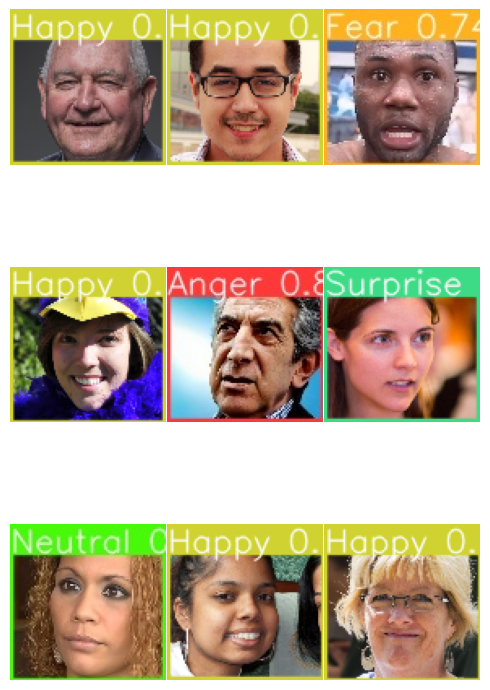

In [27]:
disp_img = []
for img in pred_img[next:9 + next]:
  disp_img.append(img)
  next +=1


#calling the display function

display_nine_images(disp_img)

This model is working well but it can be improved further by balancing the data and increasing the amount of data.

in next stage i'll implement this model on real time data. till then good bye.